# Kelompok 8 Statiska dan Probabilitas
  **Muhammad Nafi Firdaus (5027231045)**

  **Tio Axellino Irin (5027231065)**
  
  **Abid Ubaidillah A. (5027231089)**

# Dataset
Dataset yang digunakan adalah dataset asli open-source yang disediakan oleh Kaggle, dengan deskripsi sebagai berikut:

*   **Nama Dataset** : PRDECT-ID: Indonesian Emotion Classification Dataset Documentation

*   **Deskripsi** : PRDECT-ID Dataset is a collection of Indonesian product review data annotated with emotion and sentiment labels. The data were collected from one of the giant e-commerce in Indonesia named Tokopedia. The dataset contains product reviews from 29 product categories on Tokopedia that use the Indonesian language. Each product review is annotated with a single emotion, i.e., love, happiness, anger, fear, or sadness. The group of annotators does the annotation process to provide emotion labels by following the emotions annotation criteria created by an expert in clinical psychology. Other attributes related to the product review are also extracted, such as Location, Price, Overall Rating, Number Sold, Total Review, and Customer Rating, to support further research.

*  **Daftar Atribut**



| Atribut           | Deskripsi                                                |
|-------------------|----------------------------------------------------------|
| Category          | Kategori produk                                          |
| Product Name      | Nama dari produk                                         |
| Location          | Lokasi domisili pelanggan                                |
| Price             | Harga produk                                             |
| Overall Rating    | Penilaian keseluruhan                                    |
| Number Sold       | Jumlah produk terjual                                    |
| Total Review      | Jumlah ulasan produk                                     |
| Customer Rating   | Penilaian produk oleh Pelanggan                           |
| Customer Review   | Ulasan pelanggan                                         |
| Sentiment         | Citra produk (positif dan negatif)                       |
| Emotion           | Emosi dari pelanggan                                     |


* Jumlah kolom : 10

* Jumlah baris : 5.400

* Sumber : https://www.kaggle.com/datasets/jocelyndumlao/prdect-id-indonesian-emotion-classification

# **PRDECT-ID: Indonesian Emotion Classification Dataset Documentation**



## Tujuan Analisis

Analisis data ini bertujuan untuk mengoptimalkan strategi bisnis dengan fokus pada beberapa aspek kunci. Pertama, optimasi harga produk dengan memahami hubungan antara harga, sentimen, dan penilaian pelanggan. Selanjutnya, pemahaman lebih dalam terkait preferensi konsumen diharapkan dapat membimbing strategi pemasaran dan pengembangan produk. Analisis ulasan pelanggan juga menjadi instrumen untuk meningkatkan kualitas produk. Tujuan lain mencakup segmentasi pasar berdasarkan preferensi konsumen, optimasi pemasaran dan promosi, serta peningkatan layanan pelanggan dengan mengidentifikasi area peningkatan yang dapat memperkuat hubungan bisnis dan meningkatkan pengalaman pelanggan secara keseluruhan.

## **1. Memahami Dataset**

### a. **Memuat Dataset**
Dataset berbentuk CSV, diimport menggunakan library Pandas dengan bahasa pemrograman Python.



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving PRDECT-ID Dataset.csv to PRDECT-ID Dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from IPython.display import display, Image
import random

#PRDECT-ID: Indonesian Emotion Classification dataset
dataset = pd.read_csv('PRDECT-ID Dataset.csv')

### b. **Menampilkan Datesets**

In [ ]:
dataset

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy
...,...,...,...,...,...,...,...,...,...,...,...
5395,Household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,Jakarta Pusat,35000,4.9,1431,562,5,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive,Love
5396,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive,Love
5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,"pengemasan barang baik, kondisi barang jg utuh...",Positive,Happy
5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive,Happy


**Cek apakah ada missing values**

In [ ]:
dataset.isna().sum()

Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64

Tidak ada missing values dalam dataset

**Cek apakah ada baris duplikat dalam dataset**

In [ ]:
dataset.duplicated().sum()

7

In [ ]:
duplicate_rows = dataset[dataset.duplicated()]
print("Baris yang Duplikat:")
print(duplicate_rows)

Baris yang Duplikat:
                   Category  \
29    Computers and Laptops   
72    Computers and Laptops   
296        Toys and Hobbies   
723     Office & Stationery   
839              Automotive   
2197                  Sport   
2198                  Sport   

                                           Product Name  \
29    cooling pad laptop tahan 24 jam 6.000 Rpm angi...   
72    Usb HUB Vention 4 Port Usb 3.0 2.0 High Speed ...   
296                         Kereta Thomas Mainan Thomas   
723   ( ISI 30 Roll) Kertas Print Kasir thermal pape...   
839   Hayaidesu Keychain Gantungan Kunci Aksesoris V...   
2197  5-60kg Adjustable Handgrip Hand Grip Alat Fitn...   
2198  5-60kg Adjustable Handgrip Hand Grip Alat Fitn...   

                    Location   Price  Overall Rating  Number Sold  \
29             Kota Surabaya  385000             5.0         2716   
72             Jakarta Barat  112000             4.9        14900   
296           Kota Tangerang   59000             4

Ternyata ada **7** baris yang duplikat dalam dataset. Maka kita harus menghapus baris-baris yang duplikat dari dataset.

In [ ]:
dataset_cleaned = dataset.drop_duplicates()


In [ ]:
dataset_cleaned.duplicated().sum()

0

Data sebelumnya.

In [ ]:
dataset[25:35]

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
25,Computers and Laptops,Cooler Master Notepal CMC3 Silent Fan Laptop C...,Jakarta Barat,112000,4.9,5988,2969,5,Barang cepat sampai. Kualitas bagus dan pengir...,Positive,Happy
26,Computers and Laptops,Cooler Master Notepal CMC3 Silent Fan Laptop C...,Jakarta Barat,112000,4.9,5988,2969,5,"Bagus, berkualitas, sesuai gbr. Makasih Seller...",Positive,Happy
27,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,"mantap kipasnya kenceng, barangnya berkualitas...",Positive,Happy
28,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,mantap proses pengerjaan dan pengiriman juga b...,Positive,Happy
29,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,"mantap kipasnya kenceng, barangnya berkualitas...",Positive,Happy
30,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,Penjualnya Ramah Melayani Pembeli Dengan Sabar...,Positive,Happy
31,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,"barang sampai dengan cepat, packingnya rapi da...",Positive,Happy
32,Computers and Laptops,MacBook Skin Keyboard Protector TRANSPARANT BE...,Jakarta Utara,15000,4.9,690,338,5,Sangat presisi dan pas,Positive,Happy
33,Computers and Laptops,MacBook Skin Keyboard Protector TRANSPARANT BE...,Jakarta Utara,15000,4.9,690,338,5,"Puas banget, seller helpfull, sangat responsif...",Positive,Happy
34,Computers and Laptops,MacBook Skin Keyboard Protector TRANSPARANT BE...,Jakarta Utara,15000,4.9,690,338,5,"Mantappp, responnya juga memuaskan. sudah dico...",Positive,Happy


Data baru dengan duplikat data yang sudah dihapus.

In [ ]:
dataset_cleaned[25:35]


,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
25,Computers and Laptops,Cooler Master Notepal CMC3 Silent Fan Laptop C...,Jakarta Barat,112000,4.9,5988,2969,5,Barang cepat sampai. Kualitas bagus dan pengir...,Positive,Happy
26,Computers and Laptops,Cooler Master Notepal CMC3 Silent Fan Laptop C...,Jakarta Barat,112000,4.9,5988,2969,5,"Bagus, berkualitas, sesuai gbr. Makasih Seller...",Positive,Happy
27,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,"mantap kipasnya kenceng, barangnya berkualitas...",Positive,Happy
28,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,mantap proses pengerjaan dan pengiriman juga b...,Positive,Happy
30,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,Penjualnya Ramah Melayani Pembeli Dengan Sabar...,Positive,Happy
31,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,"barang sampai dengan cepat, packingnya rapi da...",Positive,Happy
32,Computers and Laptops,MacBook Skin Keyboard Protector TRANSPARANT BE...,Jakarta Utara,15000,4.9,690,338,5,Sangat presisi dan pas,Positive,Happy
33,Computers and Laptops,MacBook Skin Keyboard Protector TRANSPARANT BE...,Jakarta Utara,15000,4.9,690,338,5,"Puas banget, seller helpfull, sangat responsif...",Positive,Happy
34,Computers and Laptops,MacBook Skin Keyboard Protector TRANSPARANT BE...,Jakarta Utara,15000,4.9,690,338,5,"Mantappp, responnya juga memuaskan. sudah dico...",Positive,Happy
35,Computers and Laptops,"Logitech Bluetooth Keyboard K380 , K 380 , K-3...",Jakarta Barat,365000,5.0,2554,1396,5,Mantap barangnya cepet sampai dan enak digunai...,Positive,Happy


Dapat diamati bahwa data yang sebelumnya mengalami duplikasi terletak pada baris ke-29 dan baris ke-27. Setelah menghapus data yang memiliki duplikat, sekarang dataset tidak lagi mengandung duplikasi data.

**Dataset Baru**

In [ ]:
dataset_cleaned

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy
...,...,...,...,...,...,...,...,...,...,...,...
5395,Household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,Jakarta Pusat,35000,4.9,1431,562,5,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive,Love
5396,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive,Love
5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,"pengemasan barang baik, kondisi barang jg utuh...",Positive,Happy
5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive,Happy


Terlihat bahwa dataset terbaru terdiri dari **5393** baris dan **11** kolom.

In [ ]:
# hanya menampilkan 5 sampel data teratas
dataset_cleaned.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


### **c. Mengidentifikasi Atribut**
Mengidentifikasi jenis-jenis atribut pada data, tipe data setiap atribut, dan arti dari setiap atribut.

In [ ]:
# list nama atribut
dataset_cleaned.columns.values.tolist()

['Category',
 'Product Name',
 'Location',
 'Price',
 'Overall Rating',
 'Number Sold',
 'Total Review',
 'Customer Rating',
 'Customer Review',
 'Sentiment',
 'Emotion']

**Melihat tipe data tiap masing-masing atributt**

In [ ]:
dataset_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5393 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5393 non-null   object 
 1   Product Name     5393 non-null   object 
 2   Location         5393 non-null   object 
 3   Price            5393 non-null   int64  
 4   Overall Rating   5393 non-null   float64
 5   Number Sold      5393 non-null   int64  
 6   Total Review     5393 non-null   int64  
 7   Customer Rating  5393 non-null   int64  
 8   Customer Review  5393 non-null   object 
 9   Sentiment        5393 non-null   object 
 10  Emotion          5393 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 505.6+ KB


In [ ]:
dataset_cleaned.dtypes

Category            object
Product Name        object
Location            object
Price                int64
Overall Rating     float64
Number Sold          int64
Total Review         int64
Customer Rating      int64
Customer Review     object
Sentiment           object
Emotion             object
dtype: object

Berikut adalah deskripsi atribut/kolom yang kita dapat dari Kaggle:



| Atribut            | Deskripsi                                                                   |
|--------------------|-----------------------------------------------------------------------------|
| Category           | Variabel kategorikal yang menunjukkan jenis-jenis kategori dari produk.      |
| Product Name       | Variabel kategorikal yang menunjukkan nama dari sebuah produk.               |
| Location           | Variabel kategorikal yang menunjukkan lokasi domisili dari pelanggan.         |
| Price              | Variabel numerik yang menunjukkan harga dari suatu produk.                   |
| Overall Rating     | Variabel numerik yang menunjukkan penilaian suatu produk secara keseluruhan.|
| Number Sold        | Variabel numerik yang menunjukkan jumlah suatu produk terjual.               |
| Total Review       | Variabel numerik yang menunjukkan jumlah ulasan dari suatu produk.          |
| Customer Rating    | Variabel numerik yang menunjukkan penilaian suatu produk oleh pelanggan.    |
| Customer Review    | Variabel kategorikal yang menunjukkan ulasan pelanggan terhadap suatu produk.|
| Sentiment          | Variabel kategorikal yang menunjukkan citra terhadap suatu produk.           |
| Emotion            | Variabel kategorikal yang menunjukkan emosi dari pelanggan terhadap suatu produk.|

Terdapat beberapa atribut yang mungkin saja dapat mempengaruhi data ini, yaitu:

*   **Price**
*   **Number Sold**
*   **Overall Rating**
*   **Customer Rating**
*   **Customer Review**
*   **Sentiment**
*   **Emotion**
*   **Location**
*   **Category**











Kita harus mengidentifikasi atribut satu per-satu.



### 1). Price, Number Sold, Customer Rating
Atribut "Price", "Number Sold", dan "Customer Rating" berisi data dengan tipe data int atau bilangan bulat. Kita tidak perlu mengetahui nilai distinct-nya karena hasilnya pasti banyak sekali. Kita hanya perlu mencari apakah atribut ini memiliki nilai yang "aneh".

In [ ]:
# cek apakah ada nilai null
dataset_cleaned['Price'].isnull().values.any()

False

In [ ]:
# cek apakah ada nilai null
dataset_cleaned['Number Sold'].isnull().values.any()

False

In [ ]:
# cek apakah ada nilai null
dataset_cleaned['Customer Rating'].isnull().values.any()

False

Tidak ada nilai "null", artinya atribut ini cukup baik, tidak perlu melalui pre-processing.

### 2). Overall Rating
Atribut "Overall Rating" berisi data dengan tipe data float atau bilangan pecahan. Kita tidak perlu mengetahui nilai distinct-nya karena hasilnya pasti banyak sekali. Kita hanya perlu mencari apakah atribut ini memiliki nilai yang "aneh".


In [ ]:
# cek apakah ada nilai null
dataset_cleaned['Overall Rating'].isnull().values.any()

False

Tidak ada nilai "null", artinya atribut ini cukup baik, tidak perlu melalui pre-processing.



### 3). Customer Review, Sentiment, Emotion
Atribut "Customer Review", "Sentiment", dan "Emotion" berisi data dengan tipe data object atau string atau karakter. Atribut ini sepertinya saling berhubungan. Kita harus cek lagi.


In [ ]:
# cek semua nilai yang berbeda dalam kolom "Customer Review"
dataset_cleaned['Customer Review'].unique().tolist()

['Alhamdulillah berfungsi dengan baik. Packaging aman. Respon cepat dan ramah. Seller dan kurir amanah',
 'barang bagus dan respon cepat, harga bersaing dengan yg lain.',
 'barang bagus, berfungsi dengan baik, seler ramah, pengiriman cepat',
 'bagus sesuai harapan penjual nya juga ramah. trimakasih pelapak ??',
 'Barang Bagus, pengemasan Aman, dapat Berfungsi dengan Baik',
 'barang bagus, seller ramah..',
 'mantap paten joss',
 'Works fine. Respon seller cepat, barang berfungsi dengan baik. Recommended.',
 'barang bagus.. segel.. utuh.. original.. berfungsi dengan bener.. seller respon nya ajib.. cepat amir... uda gt kasi sarannya pas banget lg dengan kebutuhan.. mantabbb',
 'Barang datang dan berfungsi dengan baik dan terlihat bagus kali ada lampu birunya.',
 'Pengiriman super cepat, barang bagus, recommended seller, thanks',
 'alhamdulillah barangnya udah nyampe... d coba bagus... semoga awet... terima kasih seller kurir dan tokopedia...',
 'Penjual amanah, responsif. Kabel berfungsi

In [ ]:
# cek semua nilai yang berbeda dalam kolom "Customer Review"
dataset_cleaned['Sentiment'].unique().tolist()

['Positive', 'Negative']

In [ ]:
# cek semua nilai yang berbeda dalam kolom "Customer Review"
dataset_cleaned['Emotion'].unique().tolist()

['Happy', 'Sadness', 'Anger', 'Love', 'Fear']

In [ ]:
import pprint

# function to get unique values
def unique(mylist):
    unique_list = []
    for x in mylist:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

    pprint.pprint(unique_list)

In [ ]:
# cek semua pasangan yang berbeda pada kolom "weather_main" dan "weather_description"
unique(list(zip(dataset_cleaned['Customer Review'],dataset_cleaned['Sentiment'],dataset_cleaned['Emotion'])))

Streaming output truncated to the last 5000 lines.
  'Negative',
  'Fear'),
 ('Bukunya asli atau ga sih? Kok kualitas kertas jelek, ga berwarna, lalu '
  'ucapan terimakasihnya masa disecarik kertas kecil terpisah gitu, ga dijilid '
  'bersamaan. Delivery ok bgt, cepat sampai, respon penjual cepat. Hanya '
  'kecewa dengan kualitas barangnya saja dengan harga segitu kualitas jelek.',
  'Negative',
  'Fear'),
 ('Kecewa kali bru beli aja udh lepas halaman pertama . Ntah buku asli atau g '
  'nih . Packing jg kurang .',
  'Negative',
  'Sadness'),
 ('overpriced.. analisanya kurang dalam. kualitas hard cover kurang bagus, '
  '.masa begitu sampe lgsg penyok',
  'Negative',
  'Sadness'),
 ('Buku ini belum saya terima ....!', 'Negative', 'Fear'),
 ('Kualitas cetakan buku kurang baik', 'Negative', 'Sadness'),
 ('Cetakanya gak bagus sama sekali, gak sesuai harga,,,...',
  'Negative',
  'Sadness'),
 ('Pelayanan ny kurang ramah', 'Negative', 'Fear'),
 ('Produk belum diterima, tetapi status sudah

Tidak ada nilai "null" atau "None", artinya 3 atribut ini cukup baik, tidak perlu melalui pre-processing.



## 2. **Analisis Deskriptif**
Statistik deskriptif ada 2, untuk melihat pemusatan data dan penyebaran data.

* **Pemusatan data**: Mean, median, modus
* **Penyebaran data**: Varian, standar deviasi

Kita bisa menggunakan fungsi yang telah disediakan Pandas yaitu describe() untuk mendapatkan nilai mean, std, max, min, dan kuartil secara cepat.

**Melihat statistik deskriptif untuk kolom-kolom numerik.**

In [ ]:
dataset_cleaned.describe()

,Price,Overall Rating,Number Sold,Total Review,Customer Rating
count,5.393000e+03,5393.000000,5393.000000,5393.000000,5393.000000
mean,2.388814e+05,4.854348,15968.273688,2166.188763,3.087521
std,8.021253e+05,0.108281,74248.731905,2913.132692,1.765914
min,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,2.000000e+04,4.800000,1613.000000,576.000000,1.000000
50%,5.990000e+04,4.900000,3789.000000,1191.000000,3.000000
75%,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


In [ ]:
dataset_cleaned['Category'].value_counts()


Books                       200
Kitchen                     200
Health                      200
Beauty                      200
Camera                      200
Mother and Baby             200
Phones and Tablets          200
Gaming                      200
Movies and Music            200
Women's Fashion             200
Men's Fashion               200
Muslim Fashion              200
Kids and Baby Fashion       200
Electronics                 200
Household                   200
Other Products              200
Carpentry                   200
Party Supplies and Craft    200
Body Care                   200
Animal Care                 200
Food and Drink              200
Toys and Hobbies            199
Automotive                  199
Office & Stationery         199
Sport                       198
Computers and Laptops       198
Tour and Travel              80
Precious Metal               80
Property                     40
Name: Category, dtype: int64

**Menggunakan grafik untuk memvisualisasikan ukuran pemusatan data**

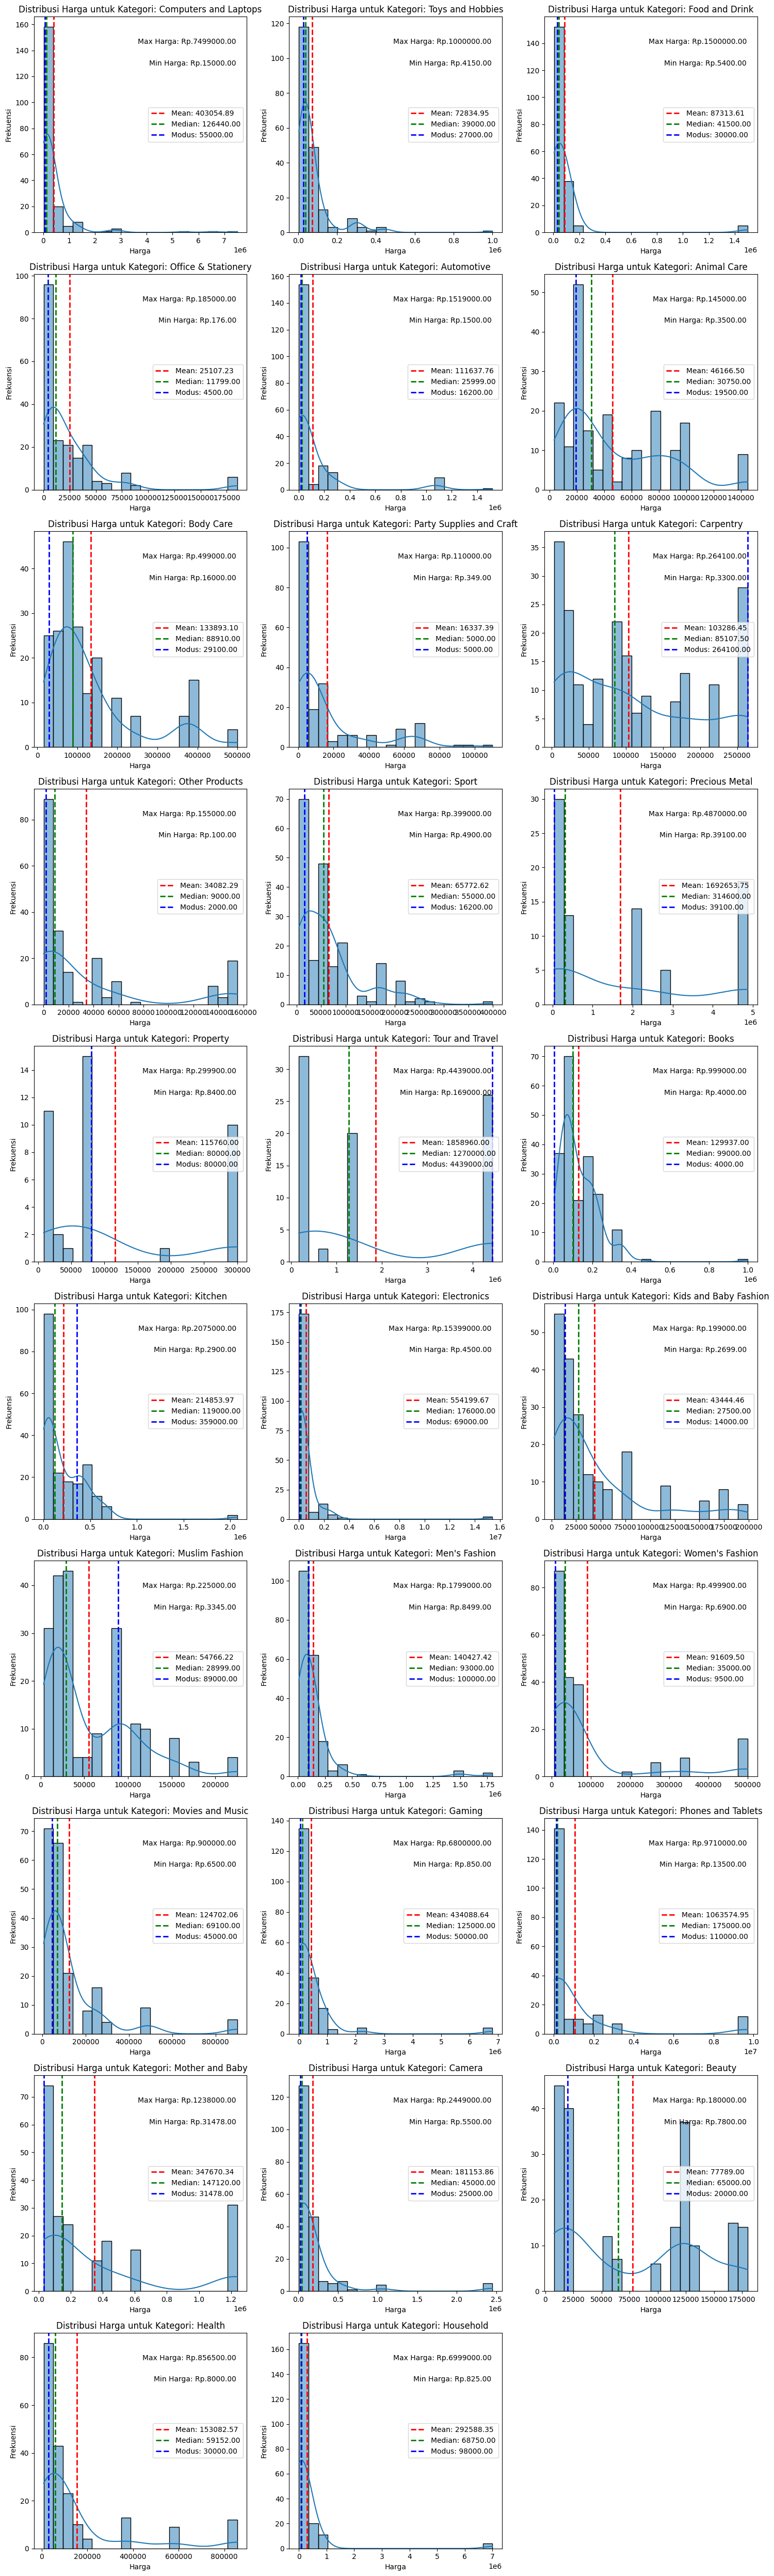

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplots untuk setiap kategori
categories = dataset_cleaned['Category'].unique()
num_categories = len(categories)

# Menentukan ukuran grid berdasarkan jumlah kategori
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, category in enumerate(categories, 1):
    # Menghitung mean, median, dan modus untuk setiap kategori
    subset = dataset_cleaned[dataset_cleaned['Category'] == category]['Price']
    mean_price = subset.mean()
    median_price = subset.median()
    mode_price = subset.mode()[0] if not subset.mode().empty else np.nan  # Memeriksa apakah ada modus

    # Membuat subplot
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(subset, bins=20, kde=True)

    # Menambahkan garis vertikal untuk mean, median, dan modus
    plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
    plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')
    plt.axvline(mode_price, color='blue', linestyle='dashed', linewidth=2, label=f'Modus: {mode_price:.2f}')

    plt.title(f'Distribusi Harga untuk Kategori: {category}')
    plt.xlabel('Harga')
    plt.ylabel('Frekuensi')

    # Menambahkan teks dengan nilai harga maksimal
    max_price = subset.max()
    min_price = subset.min()
    plt.text(0.95, 0.9, f'Max Harga: Rp.{max_price:.2f}', transform=plt.gca().transAxes,
             fontsize=10, va='top', ha='right')
    plt.text(0.95, 0.8, f'Min Harga: Rp.{min_price:.2f}', transform=plt.gca().transAxes,
             fontsize=10, va='top', ha='right')
    plt.legend(loc='center right')

plt.tight_layout()
plt.show()

- **Toys and Hobbie**s : Menurut grafik dapat disimpulkan bahwa terjadi lonjakan frekuensi pembelian di rentang harga minimal yaitu sekitar 415.000, namun terjadi penurunan drastis ketika harga mainan mulai menyentuh diatas 2 juta dan 4 juta dimana kemungkinan penurunan terjadi karena frekuensi pembelian menurun yang disebabkan oleh target pasar yang merupakan anak anak bukanlah target yang dapat memenuhi rentang harga tersebut.

- **Otomotif** : Menurut Grafik dapat disimpulkan bahwa terjadi kenaikan signifikan pada rentang harga minimal yaitu 150.000 hingga 200.000.000 yang mana merupakan rentang harga yang biasanya diisi oleh spare part ataupun harga mobil dan motor yang dibuat untuk sehari hari, sedangkan untuk diatas 200.000.000 terjadi penurunan karena mulai memasuki rentang harga mobil untuk para hobi dan kolektor.

- **Sport** : Menurut Grafik dapat disimpulkan bahwa lonjakan berarti diawal disebabkan oleh tumbuhnya minat. Minat membuat frekuensi pembelian tinggi terutama pada rentang 49.000 hingga 100.000 dimana banyak alat untuk pemula yang memulai olahraga tersedia sedangkan diatas itu mengalami penurunan disebabkan harga tinggi umumnya dibuat spesial atlet.

- **Tour and Travel** : Menurut Grafik dapat disimpulkan bahwa ada tren spesial. Dimana rentang harga maksimal memiliki frekuensi daya beli yang hampir menyaingi rentang harga minimal. Ini dapat disebabkan karena travelling membutuhkan biaya dimana rata rata orang menengah ke atas yang akan mengaksesnya. Disanalah sudah kembali ke keinginan konsumen untuk melakukan perjalanan luar negeri atau dalam negeri yang akan memengaruhi frekuensi daya beli tadi
.
- **Electronics** : Menurut Grafik dapat disimpulkan bahwa terjadinya frekuensi beli tinggi diawal rentang harga minimal disebabkan oleh banyaknya kebutuhan rumah tangga yang berdasarkan elektronika yang berada dalam rentang harga tersebut, sedangkan untuk rentang harga diatasnya mengalami penurunan besar dikarenakan umumnya alat alat tersebut hanya akan digunakan oleh industri.

**Menggunakan grafik untuk memvisualisasikan ukuran penyebaran data.**

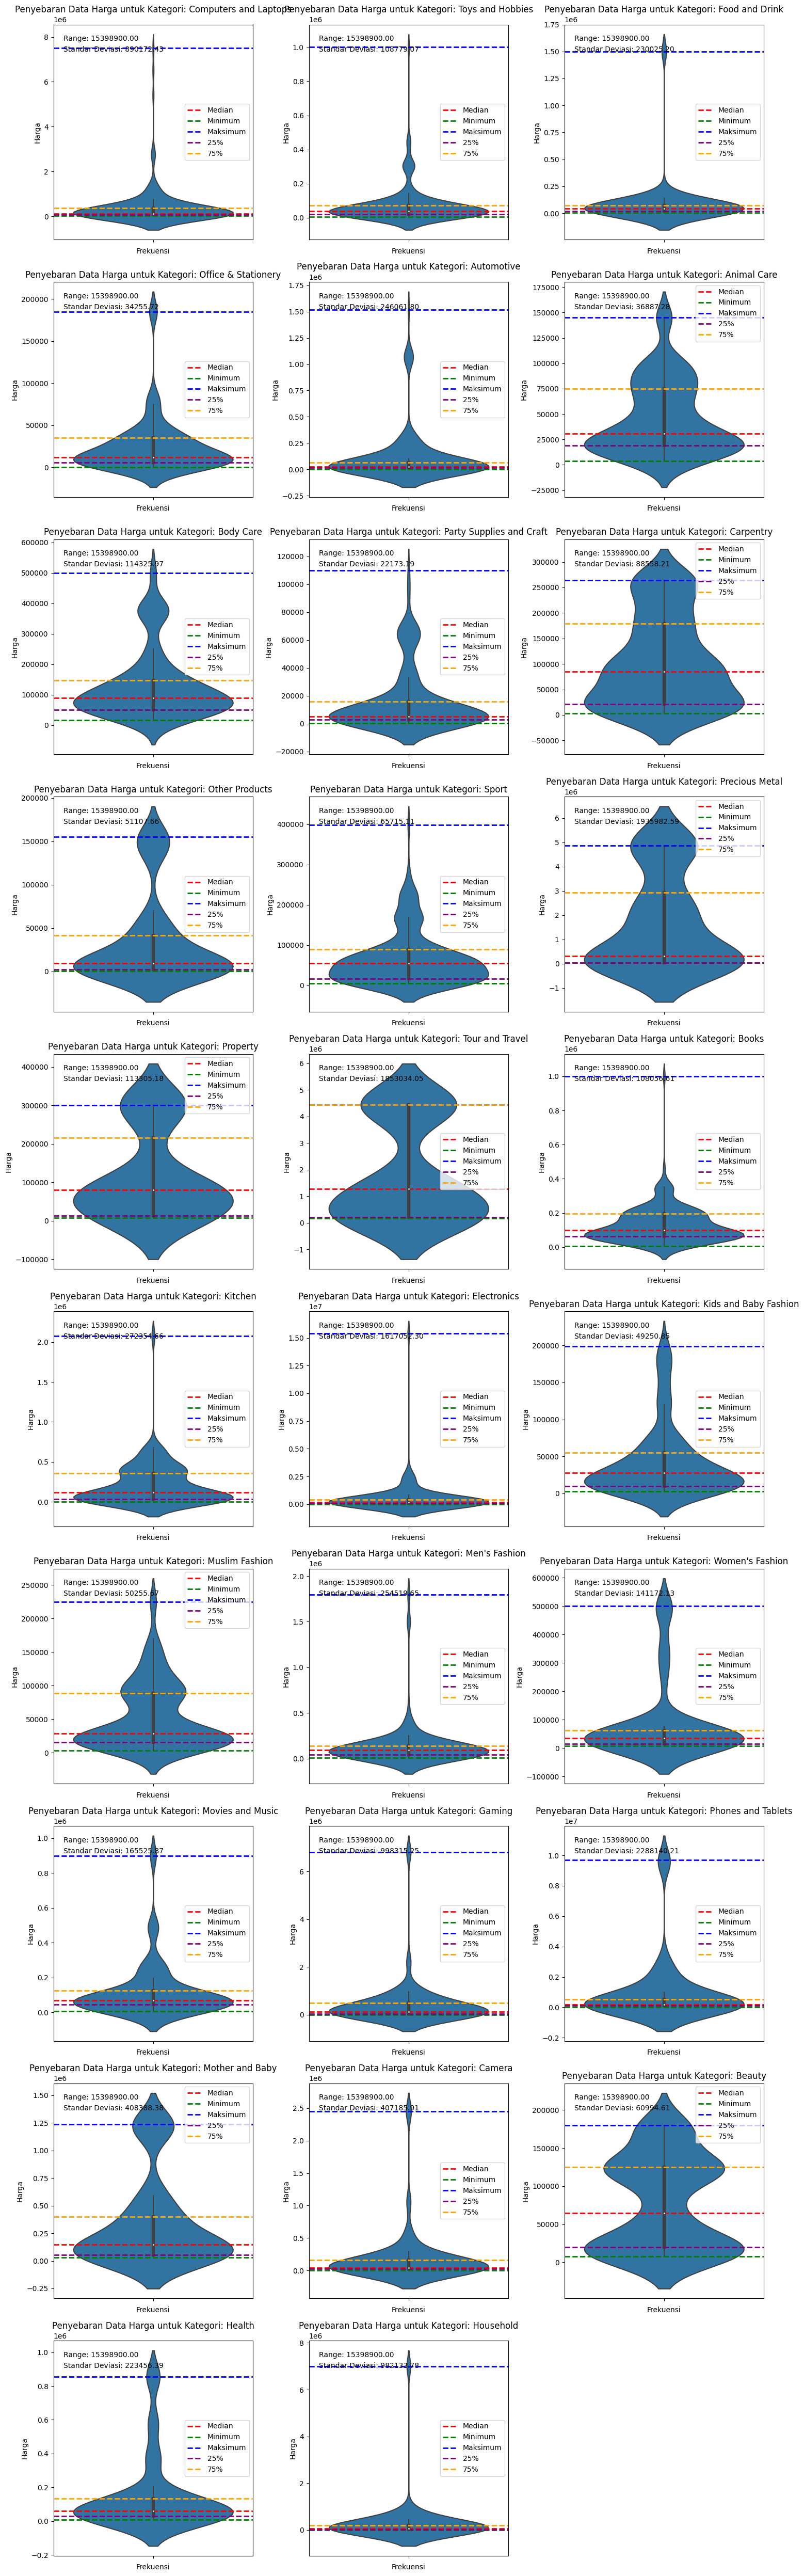

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplots untuk setiap kategori
categories = dataset_cleaned['Category'].unique()
num_categories = len(categories)

# Menentukan ukuran grid berdasarkan jumlah kategori
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, category in enumerate(categories, 1):
    # Membuat subplot
    plt.subplot(num_rows, num_cols, i)

    # Membuat violin plot untuk atribut Price
    sns.violinplot(y=dataset_cleaned[dataset_cleaned['Category'] == category]['Price'])

    # Menghitung statistik
    stats = dataset_cleaned[dataset_cleaned['Category'] == category]['Price'].describe()

    # Menghitung statistik untuk atribut 'Price'
    price_stats = dataset_cleaned['Price'].describe()

    price_range = price_stats['max'] - price_stats['min']

    # Menambahkan teks untuk range dan standar deviasi
    range_text = f'Range: {price_range:.2f}'
    std_text = f'Standar Deviasi: {stats["std"]:.2f}'
    plt.text(0.05, 0.95, range_text, transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')
    plt.text(0.05, 0.90, std_text, transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')

    # Menambahkan garis untuk median, minimum, maksimum, 25%, dan 75%
    plt.axhline(stats['50%'], color='red', linestyle='dashed', linewidth=2, label='Median')
    plt.axhline(stats['min'], color='green', linestyle='dashed', linewidth=2, label='Minimum')
    plt.axhline(stats['max'], color='blue', linestyle='dashed', linewidth=2, label='Maksimum')
    plt.axhline(stats['25%'], color='purple', linestyle='dashed', linewidth=2, label='25%')
    plt.axhline(stats['75%'], color='orange', linestyle='dashed', linewidth=2, label='75%')

    plt.title(f'Penyebaran Data Harga untuk Kategori: {category}')
    plt.xlabel('Frekuensi')
    plt.ylabel('Harga')
    plt.legend()

plt.tight_layout()
plt.show()


## 3. **Dataset Analysis**
Dataset ini dapat dianalisis dengan beberapa cara untuk mendapatkan wawasan tentang pola klasifikasi emosi di Indonesia. Analisis berikut dilakukan dalam dokumentasi ini:



**Heatmap**

<ipython-input-65-e651dfe155dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset_cleaned.corr(method ='pearson'), annot = True, cmap='coolwarm')


<Axes: >

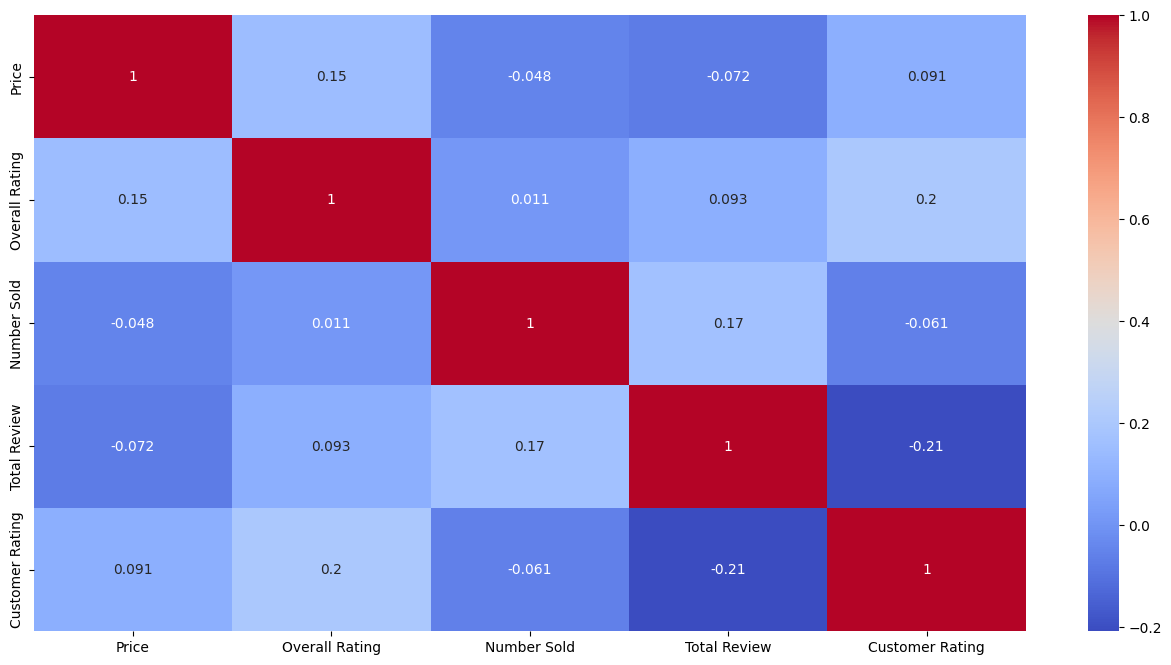

In [65]:
plt.figure(figsize=(16, 8))
sns.heatmap(dataset_cleaned.corr(method ='pearson'), annot = True, cmap='coolwarm')

## Hubungan Antara Price dan Sentiment
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan harga dan Sentimen.









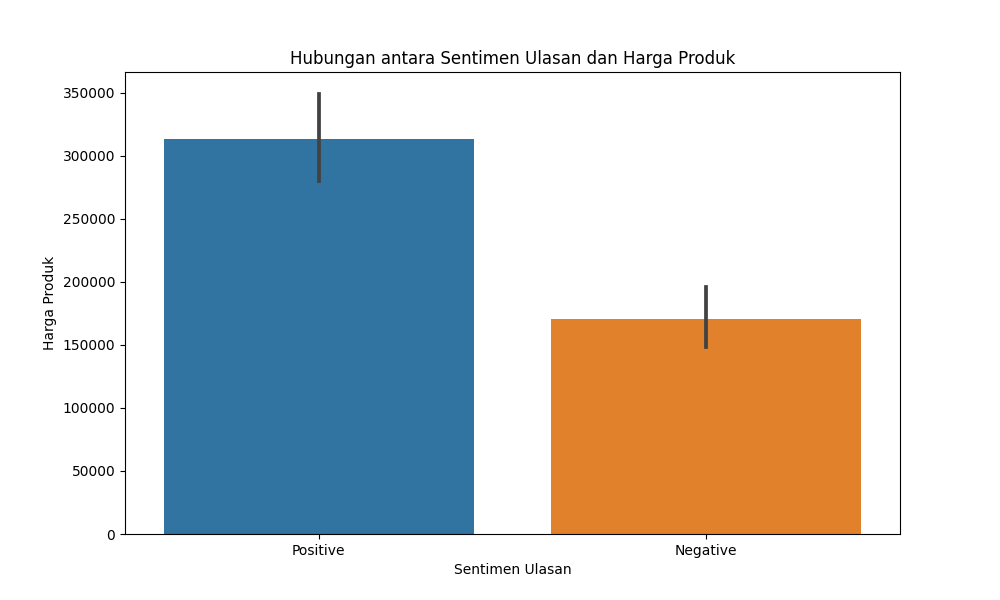

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Price', data=dataset)
plt.xlabel('Sentimen Ulasan')
plt.ylabel('Harga Produk')
plt.title('Hubungan antara Sentimen Ulasan dan Harga Produk')
plt.savefig('indonesian_emotion_classification_by_pricesentiment.png')
plt.close()

display(Image(filename='indonesian_emotion_classification_by_pricesentiment.png'))

Pertama dari grafik distribusi yang menunjukkan hubungan antara harga produk dengan segmentasi produk, kita menggunakan grafik dengan model barchart atau barplot. Karena dengan barchart atau barplot, kita bisa dengan mudah membandingkan dua variabel yaitu harga produk dan segmentasi produk. Variabel segmentasi produk ini bersifat kategorik (memiliki nilai bertipe object “positif” dan “negative”). Terlihat bahwa pada bar positf (warna biru), rentang harga produk hingga mencapai di angka +350000. Sedangkan pada bar negatif (warna orange), rentang harga produk mencapai di angka ±200000. Kesimpulan yang bisa diambil yaitu bahwa semakin tinggi harga suatu produk maka cenderung mendapatkan ulasan positif dari pelanggan.

## Hubungan Antara Customer Rating dan Price
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan penilaian pelanggan dan harga produk.

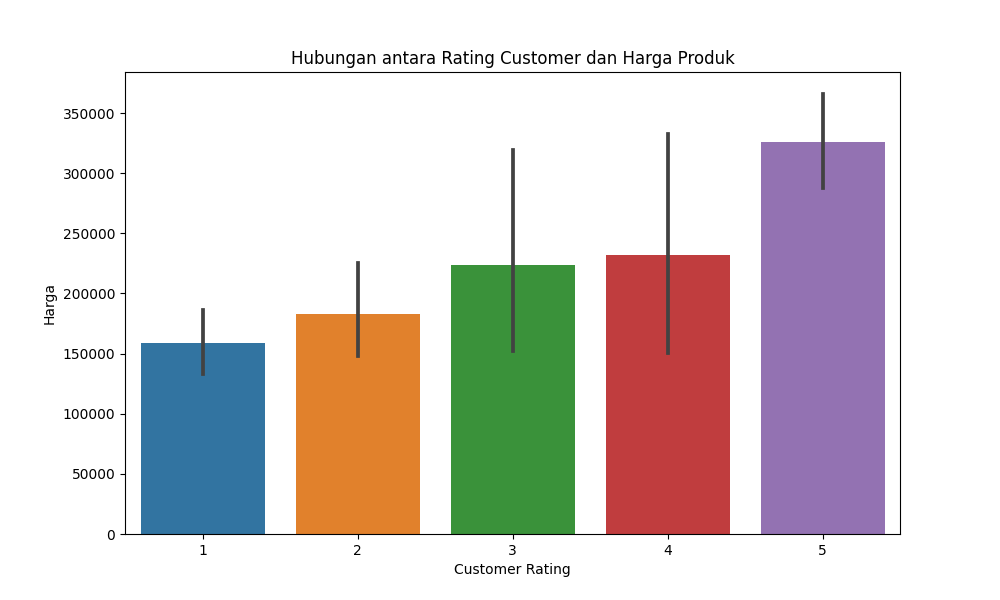

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Rating', y='Price', data=dataset_cleaned)
plt.xlabel('Customer Rating')
plt.ylabel('Harga')
plt.title('Hubungan antara Rating Customer dan Harga Produk')
plt.savefig('indonesian_emotion_classification_by_price_customerrating.png')
plt.close()

display(Image(filename='indonesian_emotion_classification_by_price_customerrating.png'))

Kedua dari grafik distribusi yang menunjukkan hubungan antara harga produk dengan penilaian pelanggan, kita menggunakan grafik dengan model barchart atau barplot. Karena dengan barchart atau barplot, kita bisa dengan mudah membandingkan dua variabel yaitu harga produk dan penilaian pelanggan. Variabel penilaian pelanggan ini bersifat kategorik (memiliki nilai bertipe int64). Terlihat bahwa pada grafik menunjukkan pola yang naik. Bar 1 memiliki rentang harga yang minimum yaitu kurang dari 200000. Pada bar 5, memiliki rentang harga yang maksimum yaitu lebih dari 350000. Jadi, kesimpulan yang bisa diambil yaitu bahwa semakin tinggi harga suatu produk maka penilaian produk tersebut juga semakin tinggi.

## Hubungan Antara Jumlah Terjual dan Harga Produk
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan jumlah terjual dan harga produk.

<ipython-input-43-ad32d0d0447b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned['Price'] = pd.to_numeric(dataset_cleaned['Price'], errors='coerce')


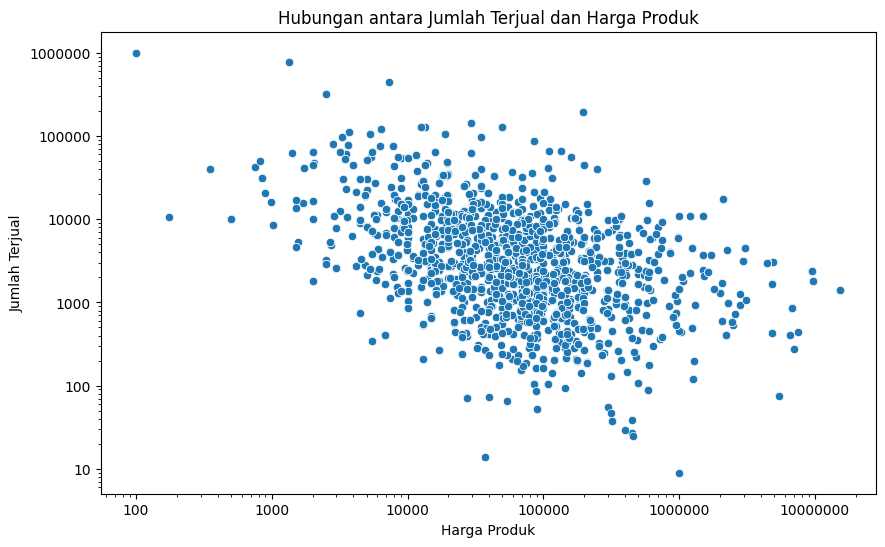

In [43]:
dataset_cleaned['Price'] = pd.to_numeric(dataset_cleaned['Price'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Number Sold', data=dataset_cleaned)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))
plt.xlabel('Harga Produk')
plt.ylabel('Jumlah Terjual')
plt.title('Hubungan antara Jumlah Terjual dan Harga Produk')
plt.show()

Menurut grafik, dapat disimpulkan bahwa terjadi kerapatan yang teratur dalam rentang harga 10.000 - 100.000, ini menunjukkan banyaknya pembelian yang dilakukan sehingga dapat membentuk kerapatan tersebut, Untuk diatas 100.000 grafik mulai cenderung turun yang menandakan adanya penurunan frekuensi pembelian

## Hubungan Antara Jumlah Terjual dan Lokasi
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan jumlah terjual dan lokasi.

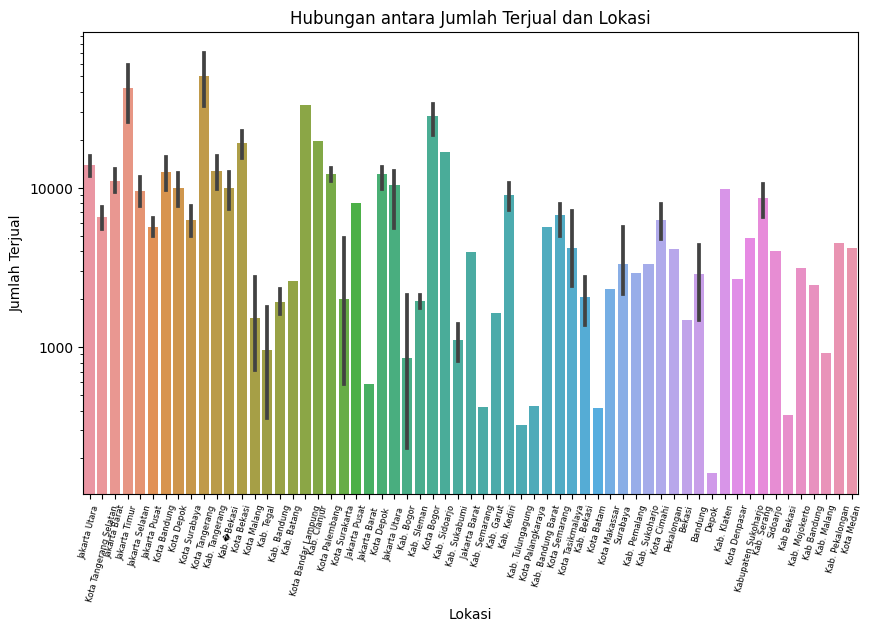

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Number Sold', data=dataset_cleaned)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))
ay = plt.gca()
ay.tick_params(axis='x', labelsize=6)
plt.xticks(rotation=75)
plt.ylabel('Jumlah Terjual')
plt.xlabel('Lokasi')
plt.title('Hubungan antara Jumlah Terjual dan Lokasi')
plt.show()

Grafik tersebut menunjukkan hubungan antara jumlah terjual dan lokasi, kita menggunakan grafik dengan model barplot. Karena dengan barplot,
Kami dapat memvisualisasikan perbedaan besaran. Jika terdapat perbedaan signifikan dalam jumlah terjual antara lokasi, grafik barplot dapat dengan jelas menunjukkan perbedaan tersebut. Hal ini dapat berguna untuk mengidentifikasi lokasi-lokasi yang memiliki performa penjualan yang lebih baik atau lebih rendah.
Penyajian Data Kategoris. Grafik barplot lebih cocok untuk menyajikan data kategoris, seperti lokasi. Nah pada grafik tersebut, pengamat bisa mengambil kesimpulan bahwa jumlah terbanyak produk terjual berada di kota Surabaya dan paling sedikit di kota Depok

## Hubungan Antara Total review Customer Rating
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan total ulasan dan penilaian pelanggan.

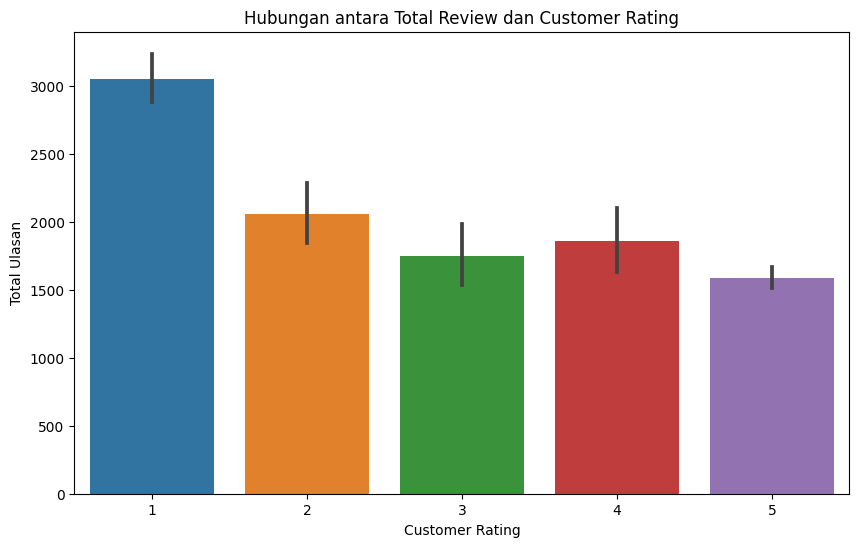

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Rating', y='Total Review', data=dataset_cleaned)
plt.xlabel('Customer Rating')
plt.ylabel('Total Ulasan')
plt.title('Hubungan antara Total Review dan Customer Rating')
plt.savefig('indonesian_emotion_classification_by_totalreview_customerrating.png')
plt.show()

Grafik tersebut menunjukkan hubungan antara total review dan costumer rating, seperti kelebihan kelebihan atau alasan kami mennggunakann grafik barplot pada hubungan  sebelumnya yakni dengan mudah membandingan selain it juga dengan menggunakan grafik barplot pengamat dengan mudah dalam mengamati visualisasi jumlah karena Grafik barplot sangat baik dalam menunjukkan jumlah produk atau observasi dalam setiap kategori. Penggamat dapat dengan cepat melihat seberapa banyak produk yang memiliki jumlah Total Review atau Customer Rating tertentu. Sebagai contoh pada grafik di atas pengamat bisa langsung menyimpulkan bahwa pada Penilaian Pelanggan 1 itu lebih banyak bahkan terbanyak dalam memperoleh ulasan yakni 3000.

## Hubungan Antara Customer Review dan Sentiment
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan ulasan pelanggan dan sentimen.

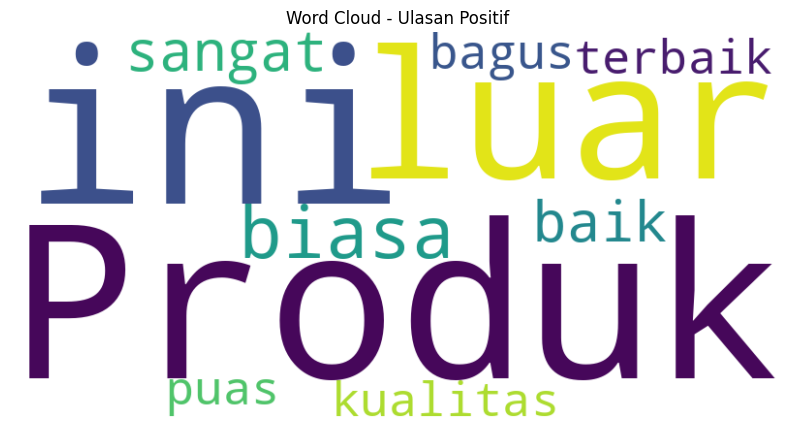

<function matplotlib.pyplot.show(close=None, block=None)>

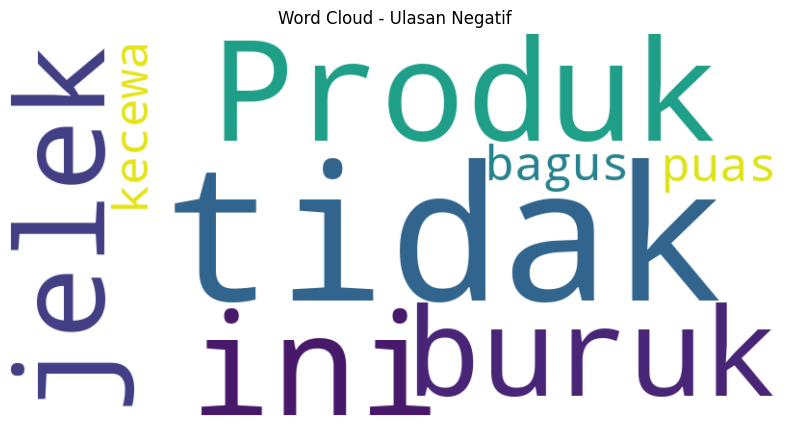

In [52]:
# Contoh ulasan positif dan negatif
positive_reviews = "Produk ini luar biasa sangat baik bagus kualitas terbaik puas"
negative_reviews = "Produk ini buruk jelek tidak bagus kecewa tidak puas"

# Menggunakan WordCloud untuk ulasan positif dan negatif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Menampilkan WordCloud untuk ulasan positif
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Ulasan Positif')
plt.axis('off')
plt.savefig('indonesian_emotion_classification_by_sentimen_customerreview_positive.png')
plt.show()

# Menampilkan WordCloud untuk ulasan negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Ulasan Negatif')
plt.axis('off')
plt.savefig('indonesian_emotion_classification_by_sentimen_customerreview_negative.png')
plt.show

Grafik diatas adalah grafik yang menggambarkan ulasan positif negatif terhadap suatu produk. Keunggulan menggunakan WordCloud grafik dalam menggambarkan ulasan positif dan negatif terletak pada kemampuannya untuk secara visual menyoroti kata-kata kunci yang paling sering muncul dalam setiap kategori. Pada ulasan positif, seperti contoh di atas, kata-kata seperti "bagus," "luar biasa," dan sejenisnya akan mendominasi WordCloud, memberikan gambaran yang jelas tentang aspek positif dari produk tersebut. Dengan menggunakan ukuran dan penataan yang bervariasi, WordCloud dapat menunjukkan sejauh mana kata-kata tersebut mendominasi dalam frekuensinya.

Sementara itu, pada ulasan negatif, kata-kata seperti "jelek" dan "buruk" akan lebih menonjol dalam WordCloud. Penggunaan warna yang berbeda atau penataan yang mencolok dapat memberikan penekanan visual terhadap aspek-aspek yang mungkin menjadi perhatian negatif bagi konsumen. Keuntungan lainnya adalah kemampuan WordCloud untuk menangkap konteks penggunaan kata-kata. Misalnya, korelasi antara kata-kata positif dan negatif seperti "bagus" dan "jelek" dapat terlihat secara jelas, memberikan pemahaman yang lebih baik tentang bagaimana konsumen menyusun ulasannya.

Dengan demikian, WordCloud tidak hanya memberikan gambaran visual yang menarik, tetapi juga dapat membantu dalam menganalisis pola dan tren dalam ulasan pelanggan. Dengan memanfaatkan keunggulan ini, perusahaan dapat lebih efektif dalam merespons dan meningkatkan kualitas produk atau layanan mereka.

## Hubungan Antara Emotion dan Sentiment
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan emosi dan sentimen.

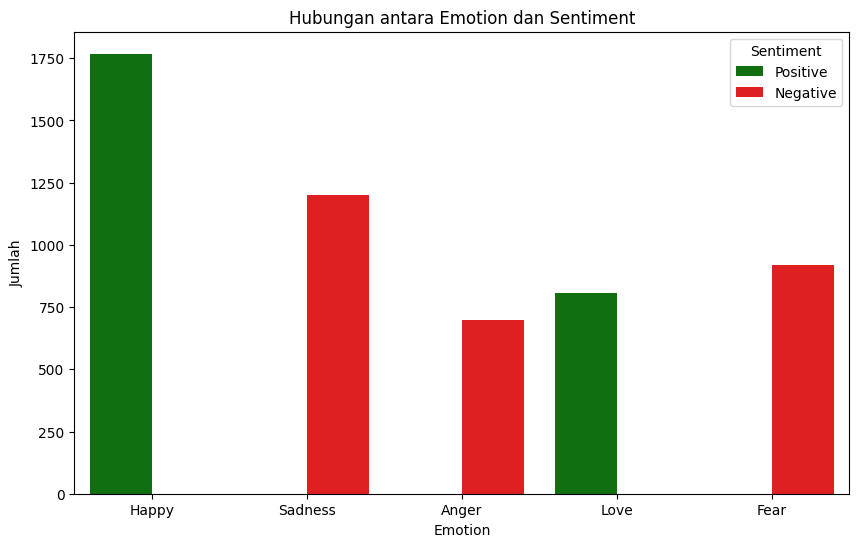

In [56]:
# Menentukan warna untuk setiap sentimen
colors = {'Positive': 'green', 'Negative': 'red'}

# Membuat countplot untuk Emotion dan membaginya berdasarkan Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', hue='Sentiment', data=dataset_cleaned, palette=colors)

# Menambahkan label dan judul
plt.title('Hubungan antara Emotion dan Sentiment')
plt.xlabel('Emotion')
plt.ylabel('Jumlah')

# Menampilkan legenda
plt.legend(title='Sentiment')

# Menampilkan plot
plt.show()

Menurut Grafik, dapat disimpulkan bahwa sentimen yang didapat dari masyarakat masih didominasi oleh kepuasan yang membahagiakan, Namun tidak sedikit yang merasakan kesedihan, masalah emosi, dan ketakutan, dan selain itu juga masih ada yang mencintai

## Hubungan Antara Customer Rating dan Emotion
Dataset ini dianalisis untuk mengidentifikasi pola dan tren dalam klasifikasi emosi Indonesia berdasarkan penilaian pelanggan dan emosi.

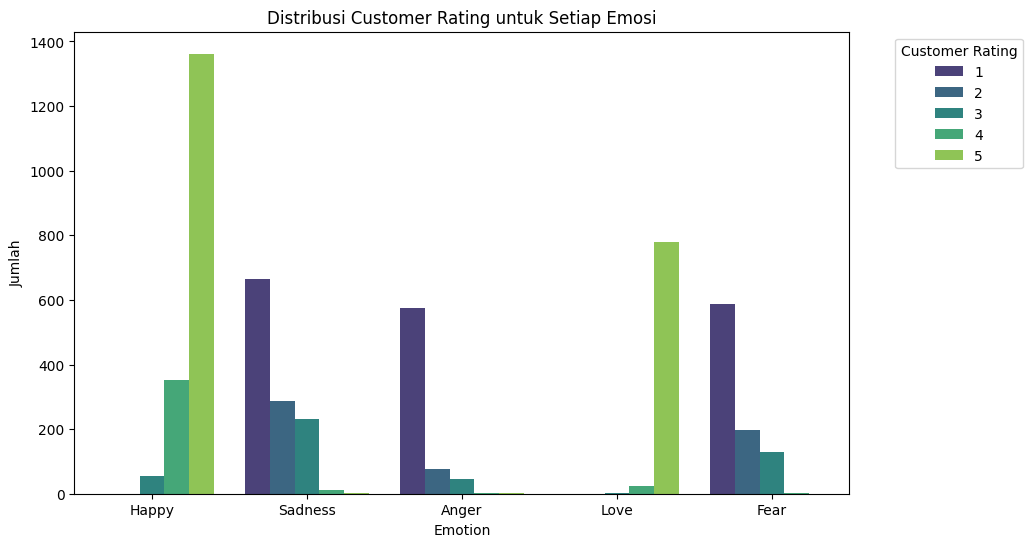

In [64]:
# Menggunakan seaborn untuk membuat scatter plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', hue='Customer Rating', data=dataset_cleaned, palette='viridis')

plt.title('Distribusi Customer Rating untuk Setiap Emosi')
plt.xlabel('Emotion')
plt.ylabel('Jumlah')
plt.legend(title='Customer Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Menurut Grafik, Dapat disimpulkan bahwa rating dan perasaan customer berkesinambungan, dapat dilihat pada perasaan happy dan love maka warna hijau yang menandakan bintang 5 mendominasi sedangkan untuk anger emotion, sadness, dan fear didominasi oleh warna ungu yang menginisiasi bintang 1

## Kesimpulan Akhir:
Mencari atribut atau variabel apa saja yang mempengaruhi klasifikasi emosi terhadap produk produk yang dijual online di Indonesia, dengan menggunakan grafik untuk memvisualisasikan ukuran pemusatan data pada beberapa kategori produk, dapat diambil kesimpulan sebagai berikut:

Toys and Hobbies:


Otomotif:


Sport:


Tour and Travel:


Electronics:


Dari hasil analisis yang dilakukan Hubungan Antara Price dan Sentiment:
Terdapat kecenderungan bahwa semakin tinggi harga produk, cenderung mendapatkan ulasan positif dari pelanggan.
Hubungan Antara Customer Rating dan Price:
Pola menunjukkan bahwa semakin tinggi harga suatu produk, penilaian produk tersebut juga cenderung semakin tinggi.
Hubungan Antara Jumlah Terjual dan Lokasi:
Kota Surabaya memiliki jumlah produk terjual yang paling tinggi, sedangkan Depok memiliki jumlah terjual yang lebih rendah.
Hubungan Antara Total Review dan Customer Rating:
Penilaian pelanggan 1 mendapatkan jumlah total review yang paling tinggi, mencapai 3000 ulasan.
Hubungan Antara Customer Review dan Sentiment:
WordCloud memberikan gambaran visual terhadap kata-kata kunci yang mendominasi ulasan positif dan negatif, membantu dalam analisis sentimen.
Hubungan Antara Emotion dan Sentiment:
Sentimen yang didapat dari masyarakat didominasi oleh kepuasan dan bahagia, tetapi juga terdapat variasi emosi lain seperti kesedihan, masalah emosi, dan ketakutan.
Kesimpulan Akhir:
Analisis menyeluruh menunjukkan bahwa harga, penilaian pelanggan, lokasi penjualan, jumlah ulasan, dan sentimen produk memiliki hubungan yang dapat diidentifikasi. Penekanan pada ulasan positif berkorelasi dengan harga yang lebih tinggi, dan aspek emosional seperti kepuasan dan ketakutan dapat mempengaruhi sentimen konsumen. Kesimpulan ini dapat membantu perusahaan untuk memahami preferensi pelanggan, meningkatkan produk, dan mengoptimalkan strategi pemasaran.



